<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Statistika_v_Python/Itogovyj_blok_Python_dlya_analiza_dannyh/Kondratev_STPY_48_Itogovyj_blok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание к итоговому проекту по курсу "Python для анализа данных"

Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -

https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. `satisfaction_level` - Уровень удовлетворенности работой
2. `Last_evaluation` - Время с момента последней оценки в годах
3. `number_projects` - Количество проектов, выполненных за время работы
4. `average_monthly_hours` - Среднее количество часов на рабочем месте в месяц
5. `time_spend_company` - Стаж работы в компании в годах
6. `work_accident` - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. `left` - уволился ли сотрудник
8. `promotion_last_5years` - повышался ли сотрудник за последние пять лет
9. `department` - отдел в котором работает сотрудник
10. `salary` - относительный уровень зарплаты


**Требуется выполнить следующее задание:**

**Задание - Баллы**

1. Загрузите файл HR.csv в pandas dataframe - 5

2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение). - 10

3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные. - 10

4. Рассчитайте сколько сотрудников работает в каждом
департаменте. - 5

5. Показать распределение сотрудников по зарплатам. - 5

6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности - 5

7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом - 10

8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности): - 10
  * Доля сотрудников с повышением за последние 5 лет
  * Средняя степень удовлетворенности
  * Среднее количество проектов

9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки - 20

10. Загрузить jupyter notebook с решение на github и прислать ссылку - 5

Итого - максимум 85 баллов

Для зачета необходимо набрать минимум 55

### Импорт библиотек

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import sklearn.metrics as metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Импорт библиотек

### Загрузка файла HR.csv в pandas dataframe

In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Statistika_v_Python/Itogovyj_blok_Python_dlya_analiza_dannyh/HR.csv')
# Загружаем данные
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [17]:
# Проверка наличия пропущенных значений
missing_values = data.isnull().sum()
print(missing_values)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


### Рассчитаем основные статистики для переменных

Непрерывные столбцы:

- satisfaction_level (Уровень удовлетворенности)
- last_evaluation (Последняя оценка)
- number_projects (Количество проектов)
- average_monthly_hours (Среднее количество часов в месяц)
- time_spend_company (Стаж работы в компании)


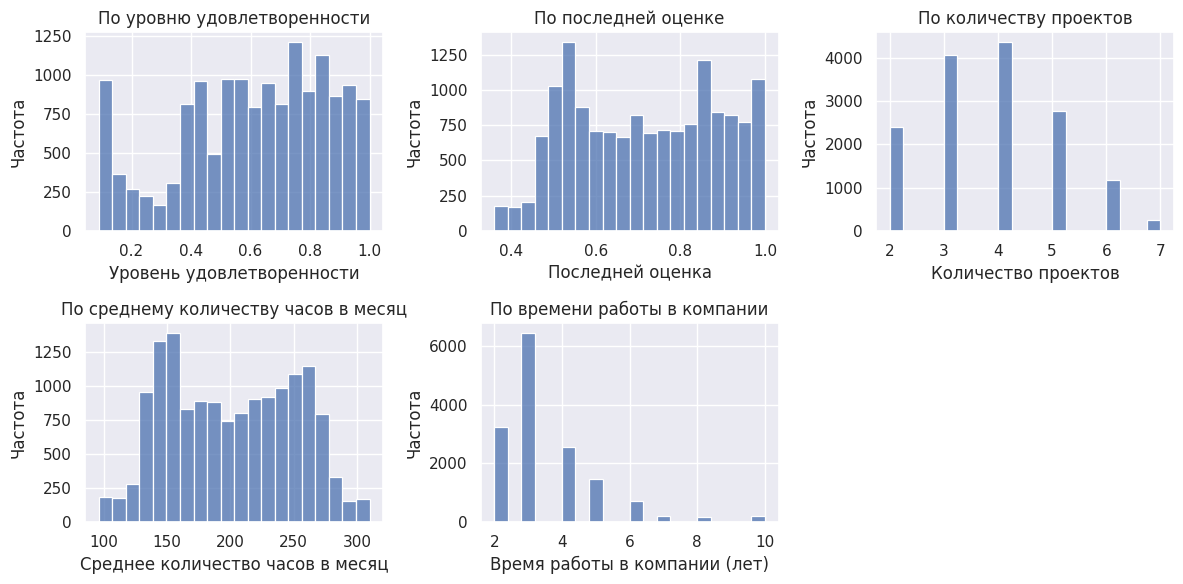


Расчет базовых статистик:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [18]:
# Посмотрим на распределение данных
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)  # Первый график
sns.histplot(data["satisfaction_level"], bins=20)
plt.xlabel("Уровень удовлетворенности")
plt.ylabel("Частота")
plt.title("По уровню удовлетворенности")

plt.subplot(2, 3, 2)  # Второй график
sns.histplot(data["last_evaluation"], bins=20)
plt.xlabel("Последней оценка")
plt.ylabel("Частота")
plt.title("По последней оценке")

plt.subplot(2, 3, 3)  # Третий график
sns.histplot(data["number_project"], bins=20)
plt.xlabel("Количество проектов")
plt.ylabel("Частота")
plt.title("По количеству проектов")

plt.subplot(2, 3, 4)  # Четвёртый график
sns.histplot(data["average_montly_hours"], bins=20)
plt.xlabel("Среднее количество часов в месяц")
plt.ylabel("Частота")
plt.title("По среднему количеству часов в месяц")

plt.subplot(2, 3, 5)  # Пятый график
sns.histplot(data["time_spend_company"], bins=20)
plt.xlabel("Время работы в компании (лет)")
plt.ylabel("Частота")
plt.title("По времени работы в компании")

plt.tight_layout()
plt.show()

# Расчет основных статистик для переменных
statistics = data[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company"]].describe()

# Вывод статистик
print()
print('Расчет базовых статистик:')
statistics


На основе базовых статистик и оценки нормальности распределения данных можно сделать следующие выводы:

1. Уровень удовлетворенности (satisfaction_level):
   - Стандартное отклонение равно 0.25, что говорит о сравнительно большой вариации в уровне удовлетворенности.
   - Распределение данной переменной не является нормальным и имеет форму, приближенную к нормальному, с отклонениями в сторону меньших значений.

2. Последняя оценка (last_evaluation):
   - Стандартное отклонение равно 0.17, что говорит о относительно небольшой вариации в оценках последней оценки.
   - Распределение данной переменной также не является нормальным и имеет смещение в сторону более высоких значений.

3. Количество проектов (number_project):
   - Стандартное отклонение равно 1.23, что говорит о некоторой вариативности в количестве проектов.
   - Распределение данной переменной не является нормальным и имеет дискретный характер.

4. Среднее количество часов в месяц (average_montly_hours):
   - Стандартное отклонение равно 49.94, что говорит о сравнительно большой вариации в количестве часов работы в месяц.
   - Распределение данной переменной также не является нормальным и имеет форму, приближенную к нормальному, с отклонениями в сторону меньших значений.

5. Стаж работы в компании (time_spend_company):
   - Стандартное отклонение равно 1.46, что говорит о некоторой вариативности в стаже работы.
   - Распределение данной переменной не является нормальным и имеет дискретный характер.

### Рассчитаем и визуализируем корреляционную матрицу для количественных переменных.

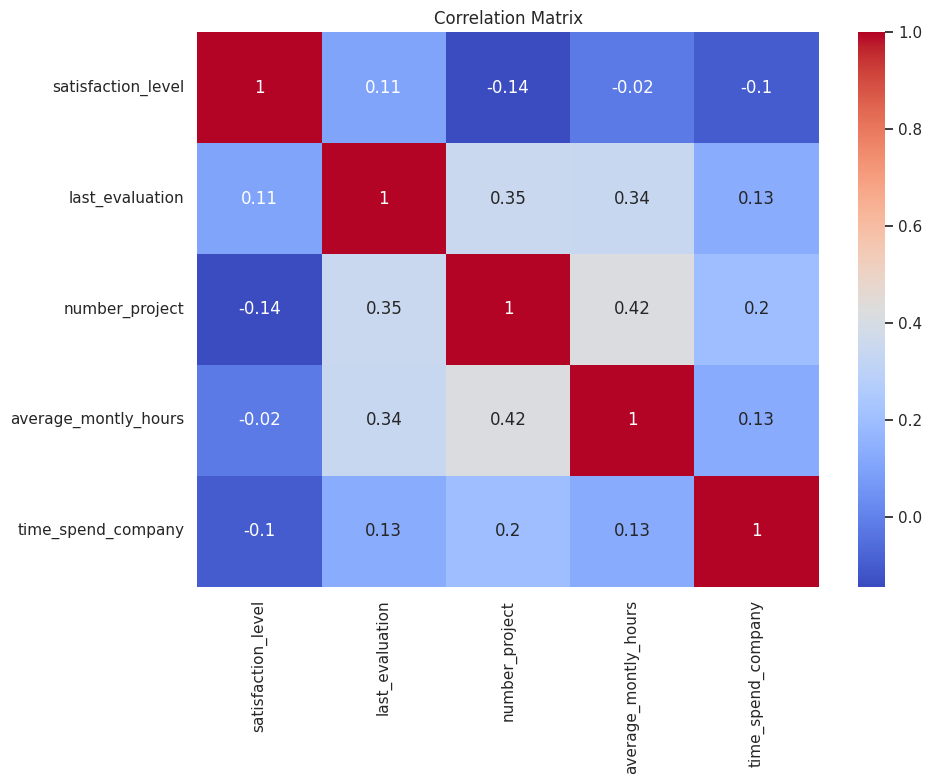


Рассчет корреляционной матрицы:
                      satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.105021       -0.142970   
last_evaluation                 0.105021         1.000000        0.349333   
number_project                 -0.142970         0.349333        1.000000   
average_montly_hours           -0.020048         0.339742        0.417211   
time_spend_company             -0.100866         0.131591        0.196786   

                      average_montly_hours  time_spend_company  
satisfaction_level               -0.020048           -0.100866  
last_evaluation                   0.339742            0.131591  
number_project                    0.417211            0.196786  
average_montly_hours              1.000000            0.127755  
time_spend_company                0.127755            1.000000  


In [19]:
# Выбор непрерывных столбцов
numeric_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
numeric_data = data[numeric_columns]

# Рассчет корреляционной матрицы
correlation_matrix = numeric_data.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Вывод корреляционной матрицы
print()
print('Рассчет корреляционной матрицы:')
print(correlation_matrix)

Из результата можно сделать следующие выводы:

Наиболее скоррелированные переменные:

Количество проектов (number_project) и среднее количество рабочих часов в месяц (average_montly_hours) имеют наибольший коэффициент корреляции 0.417. Это означает, что эти две переменные сильно связаны друг с другом и имеют положительную линейную зависимость.

Наименее скоррелированные переменные:

Уровень удовлетворенности (satisfaction_level) и стаж работы в компании (time_spend_company) имеют коэффициент корреляции -0.100866. Это также указывает на незначительную обратную связь между этими переменными.

Для большей наглядности построим точечные диаграмы для этих переменных


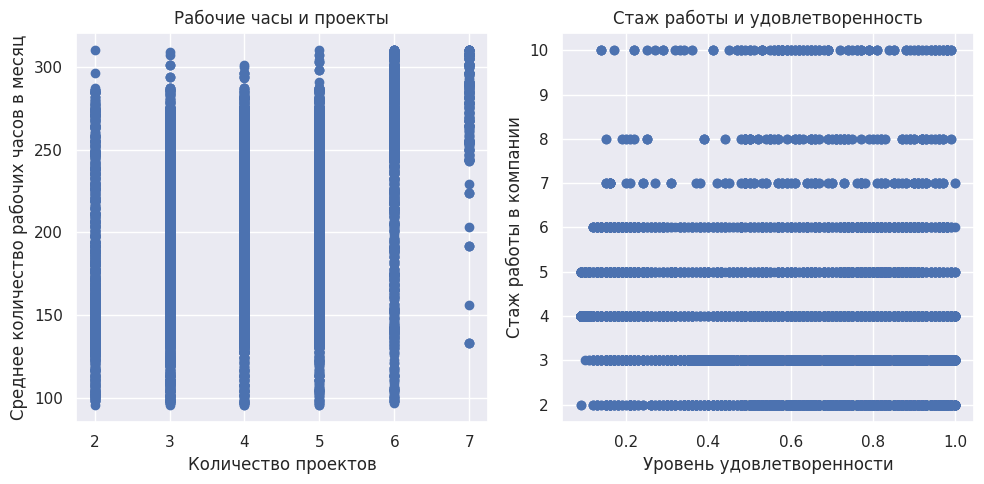

In [20]:
df = pd.DataFrame(data)

# Создание subplot с двумя графиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# График 1: Количество проектов и Среднее количество рабочих часов в месяц
ax1.scatter(df['number_project'], df['average_montly_hours'])
ax1.set_xlabel('Количество проектов')
ax1.set_ylabel('Среднее количество рабочих часов в месяц')
ax1.set_title('Рабочие часы и проекты')

# График 2: Уровень удовлетворенности и Стаж работы в компании
ax2.scatter(df['satisfaction_level'], df['time_spend_company'])
ax2.set_xlabel('Уровень удовлетворенности')
ax2.set_ylabel('Стаж работы в компании')
ax2.set_title('Стаж работы и удовлетворенность')


# Отображение диаграммы
plt.tight_layout()
plt.show()


**Рабочие часы и проекты**

Видно что у сотрудноков которые за время работы в компании выполнили 7 проектов много пробелов в данных о среднем количестве рабочих часов в диапазоне от 100 до 240 и много значений в диапазоне от 240 до 300.

Возможно, что количество проектов у сотрудника может быть связано с его загруженностью на работе и средним количеством рабочих часов в месяц. Более высокое количество проектов может означать, что у сотрудника больше работы и он вынужден работать больше часов, чтобы выполнить все задачи.

**Стаж работы и удовлетворенность**

Стотрудники работающие более 7-лет как правило оценивали свой уровень удовлетворенности выше 50%.
Это видно по пробелам в значениях от 0 до 50%

Это может свидетельствовать о том, что сотрудники с более длительным стажем чувствуют большую лояльность и удовлетворенность в компании. Это может быть связано с различными факторами, такими как стабильность работы, повышенные возможности для карьерного роста и развития, хорошие отношения с коллегами и руководством, а также удовлетворение от выполняемых задач и проектов.






### Рассчитаем сколько сотрудников работает в каждом департаменте




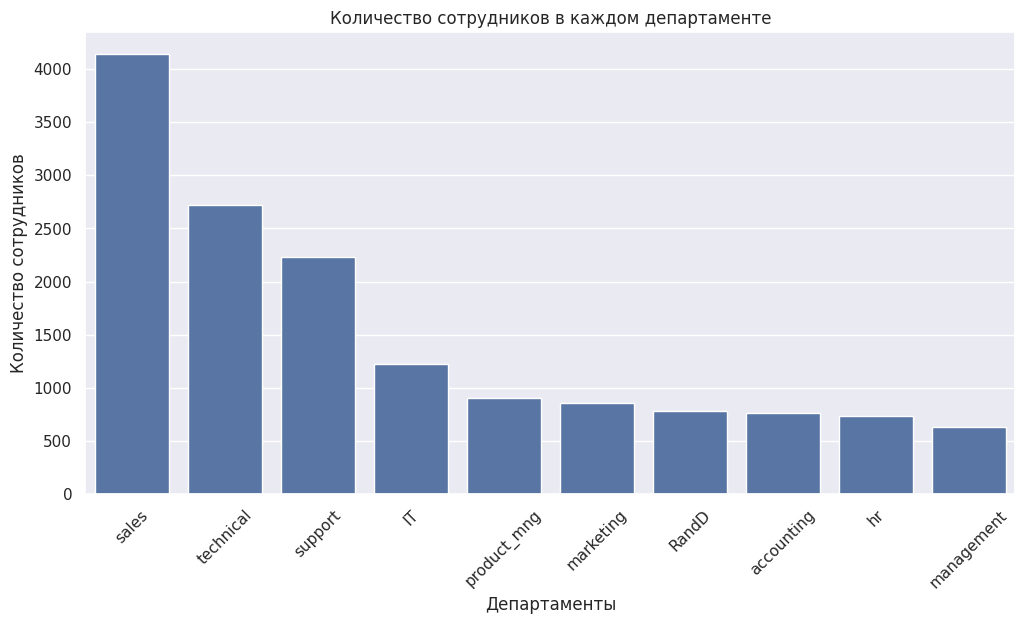


Количество сотрудников в каждом отделе:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


In [21]:
# Устанавливаем стиль графика
sns.set(style="darkgrid")

# Создаем график гистограммы
plt.figure(figsize=(12, 6))
sns.countplot(x='department', data=data, order=data['department'].value_counts().index, color='b')

# Настройки осей и заголовка на русском языке
plt.xlabel('Департаменты')
plt.ylabel('Количество сотрудников')
plt.title('Количество сотрудников в каждом департаменте')

# Поворот названий департаментов
plt.xticks(rotation=45)

# Выводим график
plt.show()

department_counts = data["department"].value_counts()

# Вывод количества сотрудников в каждом отделе
print()
print("Количество сотрудников в каждом отделе:")
print(department_counts)

### Распределение сотрудников по зарплатам

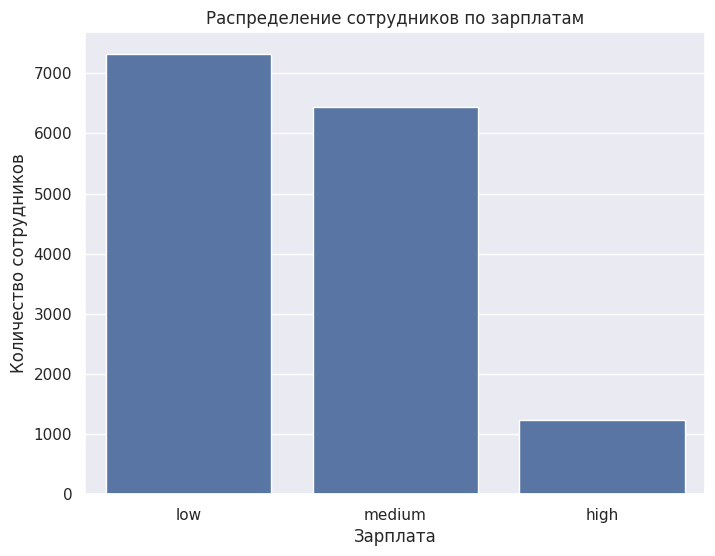

Распределение уровня зарплаты сотрудников:
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [22]:
# Устанавливаем стиль графика
sns.set(style="darkgrid")

# Создаем гистограмму распределения зарплат
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', data=data, color='b')

# Настройки осей и заголовка
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам')

# Выводим график
plt.show()

# Распределение уровня зарплаты сотруднико
salary_counts = data["salary"].value_counts()

# Вывод распределения уровня зарплаты сотрудников
print("Распределение уровня зарплаты сотрудников:")
print(salary_counts)

### Распределение сотрудников по зарплатам в каждом департаменте по отдельности

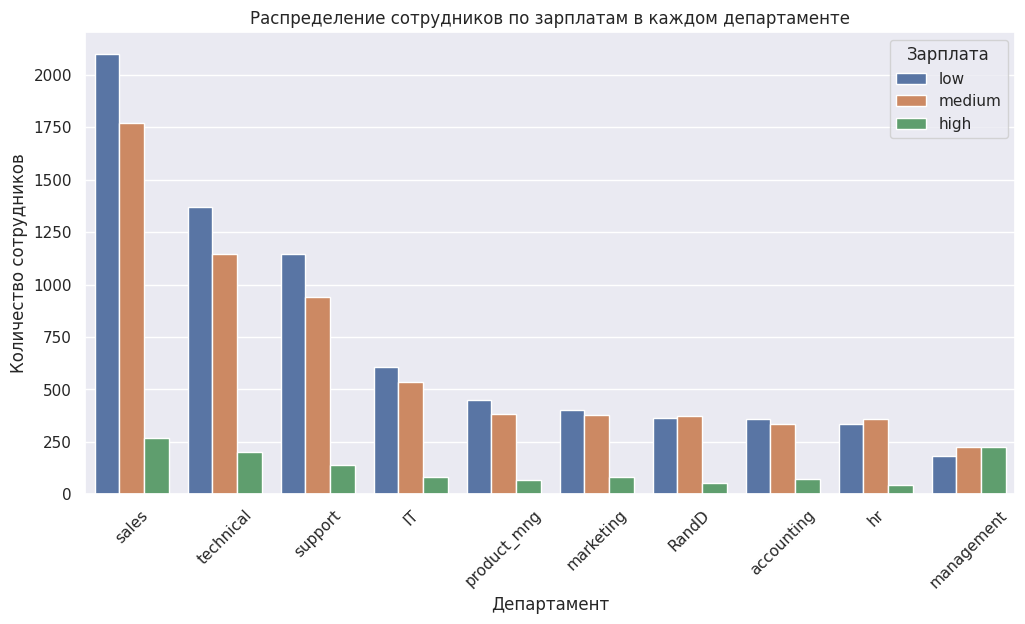

salary       high   low  medium
department                     
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147


In [23]:
# Устанавливаем стиль графика
sns.set(style="darkgrid")

# Создаем гистограмму распределения зарплат для каждого департамента
plt.figure(figsize=(12, 6))
sns.countplot(x='department', hue='salary', data=data, order=data['department'].value_counts().index)


# Настройки осей и заголовка
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')

# Поворот названий департаментов
plt.xticks(rotation=45)

# Легенда
plt.legend(title='Зарплата')

# Выводим график
plt.show()

# Создание датафрейма с распределением сотрудников по зарплатам в каждом департаменте
salary_distribution = data.groupby(['department', 'salary']).size().unstack()

# Вывод датафрейма
print(salary_distribution)

### Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

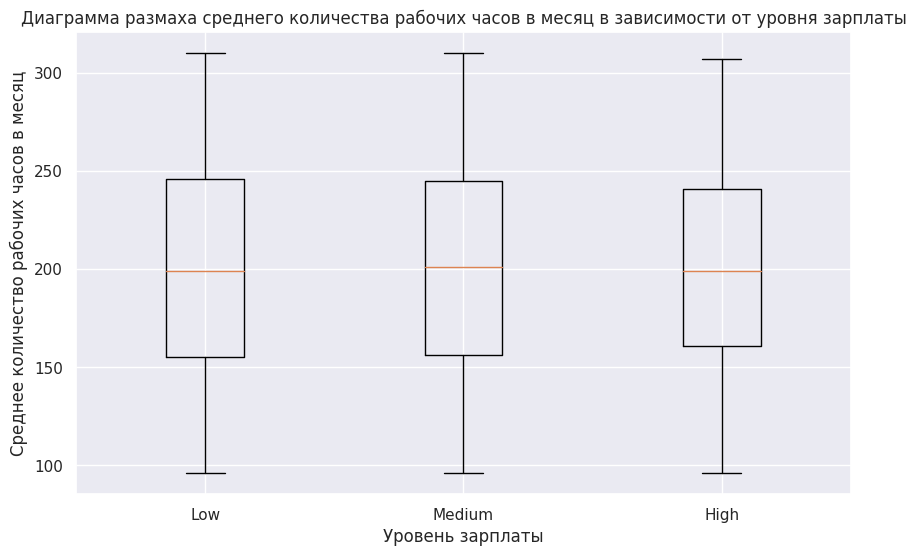

F-статистика: 0.4583624407867663
p-значение: 0.6323271153144614
Гипотеза не подтверждена: Дисперсии не отличаются статистически значимо

Базовые статистики для всех категорий:
        low_salary  medium_salary  high_salary
count  7316.000000    6446.000000  1237.000000
mean    200.996583     201.338349   199.867421
std      50.832214      49.344188    47.710446
min      96.000000      96.000000    96.000000
25%     155.000000     156.000000   161.000000
50%     199.000000     201.000000   199.000000
75%     246.000000     245.000000   241.000000
max     310.000000     310.000000   307.000000


In [24]:
# Разделение данных на три группы
low_salary = data[data['salary'] == 'low']['average_montly_hours']
medium_salary = data[data['salary'] == 'medium']['average_montly_hours']
high_salary = data[data['salary'] == 'high']['average_montly_hours']

# Построение боксплотов
plt.figure(figsize=(10, 6))
plt.boxplot([low_salary, medium_salary, high_salary])
plt.xticks([1, 2, 3], ['Low', 'Medium', 'High'])
plt.xlabel('Уровень зарплаты')
plt.ylabel('Среднее количество рабочих часов в месяц')
plt.title('Диаграмма размаха среднего количества рабочих часов в месяц в зависимости от уровня зарплаты')
plt.show()

# Проверка гомогенности дисперсий с помощью однофакторного дисперсионного анализа (ANOVA)
f_stat, p_value = stats.f_oneway(low_salary, medium_salary, high_salary)
print('F-статистика:', f_stat)
print('p-значение:', p_value)

if p_value < 0.05:
    print('Гипотеза подтверждена: Дисперсии статистически значимо отличаются')
else:
    print('Гипотеза не подтверждена: Дисперсии не отличаются статистически значимо')

# Создание датафрейма с базовыми статистиками
statistics_df = pd.DataFrame({
    'low_salary': [
        low_salary.count(), low_salary.mean(), low_salary.std(),
        low_salary.min(), low_salary.quantile(0.25), low_salary.median(),
        low_salary.quantile(0.75), low_salary.max()
    ],
    'medium_salary': [
        medium_salary.count(), medium_salary.mean(), medium_salary.std(),
        medium_salary.min(), medium_salary.quantile(0.25), medium_salary.median(),
        medium_salary.quantile(0.75), medium_salary.max()
    ],
    'high_salary': [
        high_salary.count(), high_salary.mean(), high_salary.std(),
        high_salary.min(), high_salary.quantile(0.25), high_salary.median(),
        high_salary.quantile(0.75), high_salary.max()
    ]
}, index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

print("\nБазовые статистики для всех категорий:")
print(statistics_df)

Из результатов F-теста видно, что p-значение составляет 0.6323, что гораздо больше уровня значимости 0.05. Это означает, что дисперсии количества рабочих часов в месяц для групп с разными уровнями зарплат не отличаются статистически значимо. Следовательно, не можем отвергнуть нулевую гипотезу о равенстве дисперсий.

Из базовых статистик для трех категорий видно следующее:
В целом, распределение количества рабочих часов в месяц для всех трех групп может быть приближено нормальным, и нет явных отличий в количестве рабочих часов между группами с разными уровнями зарплат.

### Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [25]:
# Фильтруем данные для уволившихся сотрудников
left_data = data[data["left"] == 1]

# Фильтруем данные для не уволившихся сотрудников
not_left_data = data[data["left"] == 0]

# Рассчитываем долю сотрудников с повышением за последние 5 лет для уволившихся и не уволившихся сотрудников
promotion_left = left_data["promotion_last_5years"].mean()
promotion_not_left = not_left_data["promotion_last_5years"].mean()

# Рассчитываем среднюю степень удовлетворенности для уволившихся и не уволившихся сотрудников
satisfaction_left = left_data["satisfaction_level"].mean()
satisfaction_not_left = not_left_data["satisfaction_level"].mean()

# Рассчитываем среднее количество проектов для уволившихся и не уволившихся сотрудников
projects_left = left_data["number_project"].mean()
projects_not_left = not_left_data["number_project"].mean()

print("Доля сотрудников с повышением за последние 5 лет (Уволившиеся):", promotion_left)
print("Доля сотрудников с повышением за последние 5 лет (Не уволившиеся):", promotion_not_left)
print("Средняя степень удовлетворенности (Уволившиеся):", satisfaction_left)
print("Средняя степень удовлетворенности (Не уволившиеся):", satisfaction_not_left)
print("Среднее количество проектов (Уволившиеся):", projects_left)
print("Среднее количество проектов (Не уволившиеся):", projects_not_left)

Доля сотрудников с повышением за последние 5 лет (Уволившиеся): 0.005320638476617194
Доля сотрудников с повышением за последние 5 лет (Не уволившиеся): 0.026251312565628283
Средняя степень удовлетворенности (Уволившиеся): 0.4400980117614114
Средняя степень удовлетворенности (Не уволившиеся): 0.666809590479524
Среднее количество проектов (Уволившиеся): 3.8555026603192384
Среднее количество проектов (Не уволившиеся): 3.786664333216661


Из результатов можно сделать следующие статистические и аналитические выводы:

1. Доля сотрудников с повышением за последние 5 лет среди уволившихся составляет 0.53%, тогда как среди не уволившихся - 2.63%. Это говорит о том, что сотрудники, которые получали повышение, имели меньшую вероятность увольнения.

2. Средняя степень удовлетворенности уволившихся сотрудников составляет 0.44, в то время как у не уволившихся - 0.67. Это подтверждает гипотезу о том, что уровень удовлетворенности сотрудников влияет на вероятность увольнения. Сотрудники с низким уровнем удовлетворенности склонны к увольнению.

3. Среднее количество проектов у уволившихся и не уволившихся сотрудников практически одинаковое - около 3.79. Это может означать, что количество проектов не сильно влияет на вероятность увольнения.

Таким образом, для снижения вероятности увольнения сотрудников, компании следует обращать внимание на их карьерное развитие, стимулировать повышение и поддерживать высокий уровень удовлетворенности сотрудников

### Построиv модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).

In [26]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(['left', 'department', 'salary'], axis=1)
y = data['left']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели LDA
lda = LDA()

# Обучение модели на обучающей выборке
lda.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lda.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Построение confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(confusion_mat)

Accuracy: 0.7533333333333333

Confusion matrix:
[[2094  200]
 [ 540  166]]


Качество модели, оцененное по метрике Accuracy, составляет примерно 75.33%. Это означает, что модель LDA достаточно точно предсказывает, уволился ли сотрудник на основе имеющихся факторов.


Confusion matrix представлена результатами:
```
True Negative (TN): Верно классифицировано не уволившихся сотрудников - 2094
False Positive (FP): Ошибочно классифицировано уволившихся сотрудников - 200
False Negative (FN): Ошибочно классифицировано не уволившихся сотрудников - 540
True Positive (TP): Верно классифицировано уволившихся сотрудников - 166
```

Из данной матрицы можно сделать следующие выводы:
- Модель верно классифицировала 2094 сотрудников, которые не уволились (True Negative).
- Модель ошибочно классифицировала 200 сотрудников, которые фактически не уволились, но предсказала их уход (False Positive).
- Модель ошибочно классифицировала 540 сотрудников, которые фактически уволились, но предсказала их остаток (False Negative).
- Модель правильно классифицировала 166 сотрудников, которые действительно уволились (True Positive).

Исходя из этих данных, можно сказать, что модель показывает некоторую способность предсказывать увольнение сотрудников, однако есть значительное количество ложно положительных и ложно отрицательных результатов.